# Mercedez Benz Greener Manufacturing

# The 156th positon - 190th position Solution

## Personal Submission Score

![](kaggle_score.png)

## Kaggle Leaderboard Score

![](upper_limit_of_private_leaderbord.png)

![](lower_limit_of_private_leaderboard.png)

###### My private score which is 0.55227 will lie between 156th and 190th place according to kaggle private leaderboard.

# 1.Business/Real-world Problem

<h2>1.1. About Mercedez </h2>

Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include, for example, the passenger safety cell with crumple zone, the airbag and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium car makers. Daimler’s Mercedes-Benz cars are leaders in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

<h2> 1.2. Problem Statement </h2>

In this competition, Daimler is challenging Kagglers to tackle the curse of dimensionality and reduce the time that cars spend on the test bench. Competitors will work with a dataset representing different permutations of Mercedes-Benz car features to predict the time it takes to pass testing. Winning algorithms will contribute to speedier testing, resulting in lower carbon dioxide emissions without reducing Daimler’s standards.

<h2>1.3 Source </h2>

To ensure the safety and reliability of each and every unique car configuration before they hit the road, Daimler’s engineers have developed a robust testing system. But, optimizing the speed of their testing system for so many possible feature combinations is complex and time-consuming without a powerful algorithmic approach. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Daimler’s production lines.


https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/overview

<h2>1.4. Real-world/Business objectives and constraints.</h2>

1. Reduce time taken by a particular model on test bench
2. Should predict the test time in few seconds or minutes but, not hours

<h1>2. Machine Learning Problem</h1>

<h2>2.1. Data</h2>

1. The Data has been provided by Daimler(Mercedez)
2. There are two data files provided. One for Train and one for Test.
3. Each files contains 4209 Data Points and 377 features.
4. There are 8 categorical features and the rest are numerical features.

<h2>2.2. Type of Machine Learning Problem</h2>

It is a Regression Problem. We have to predict the time taken by a vehicle on the test bench, which can be any real value.

<h2>2.3. Performance Metric</h2>

The Performance metric to be used is R2

![](r-squared1.png)

# Importing Libraries

In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
from sklearn.preprocessing import normalize
import seaborn as sns
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from scipy import stats
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
import string
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV   
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from prettytable import PrettyTable
import pickle
from sklearn.model_selection import RepeatedKFold,KFold
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_extraction import DictVectorizer
from xgboost import plot_importance
from mlxtend.regressor import StackingCVRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDRegressor
from scipy import stats
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.model_selection import cross_validate

## Loading Dataset

In [3]:
train_df = pd.read_csv("train.csv")
print("Number of datapoints: ", train_df.shape[0])
print("Number of features: ", train_df.shape[1])

Number of datapoints:  4209
Number of features:  378


In [4]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


## Feature Analysis

In [3]:
dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["feature name","dtypes"]
dtype_df.groupby("dtypes").agg("count").reset_index()

,dtypes,feature name
0,int64,369
1,float64,1
2,object,8


There are 369 features which has dtypes int, 8 are most probably categorical features and float type is target variable

In [4]:
unique_values_dict = {}
for col in train_df.columns:
    if col not in ["ID", "y", "X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        unique_value = str(np.sort(train_df[col].unique()).tolist())
        tlist = unique_values_dict.get(unique_value, [])
        tlist.append(col)
        unique_values_dict[unique_value] = tlist[:]
for unique_val, columns in unique_values_dict.items():
    print("Columns containing the unique values : ",unique_val)
    print(columns)
    print("--------------------------------------------------")

Columns containing the unique values :  [0, 1]
['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 'X143', 'X144', 'X145'

### Categorical Feature Analysis

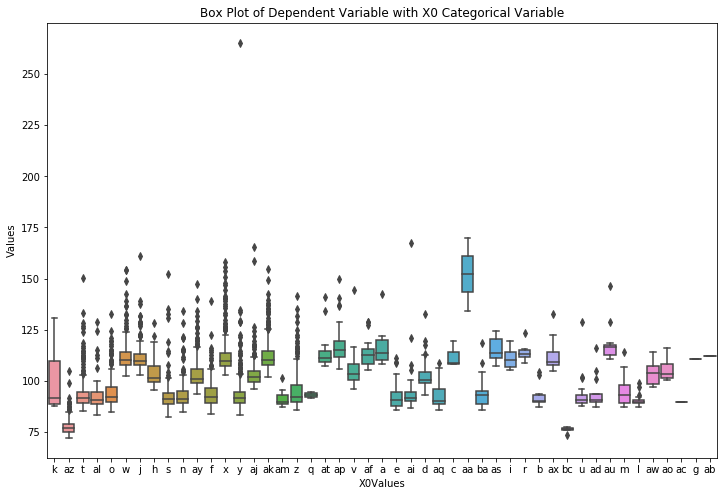

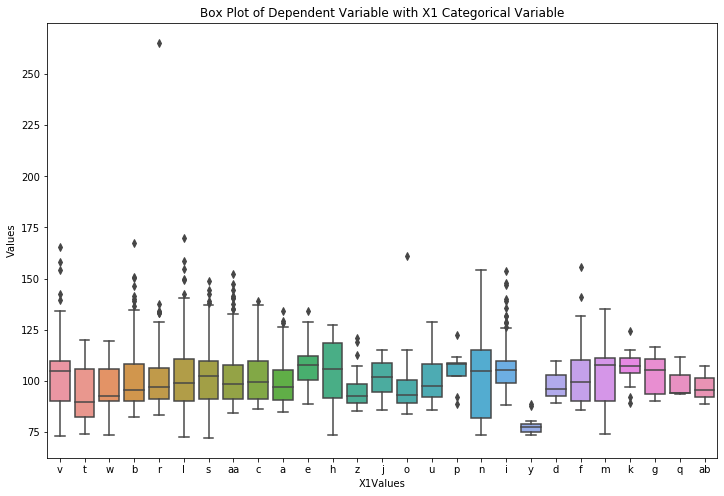

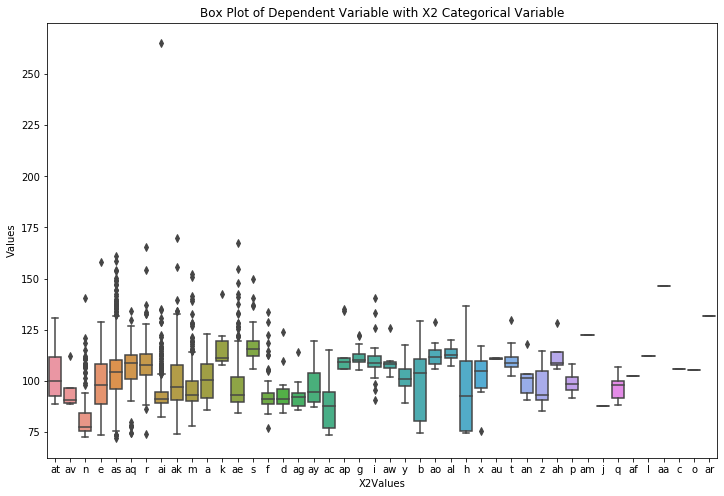

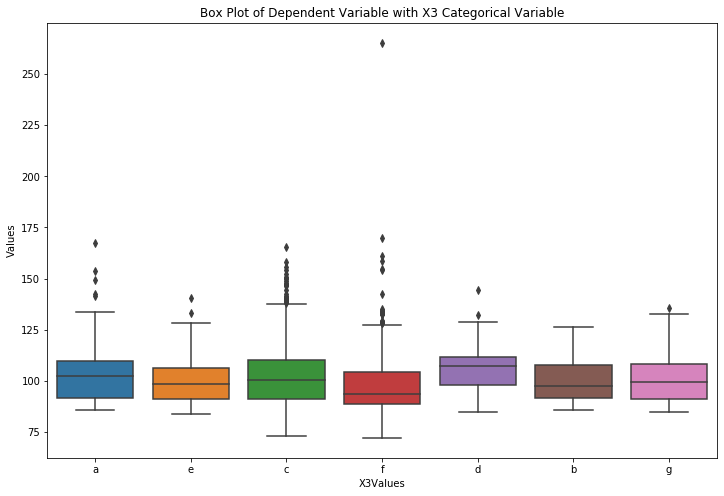

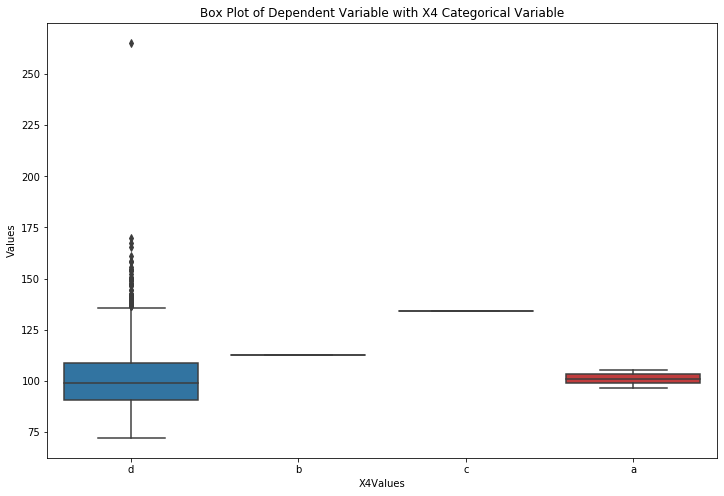

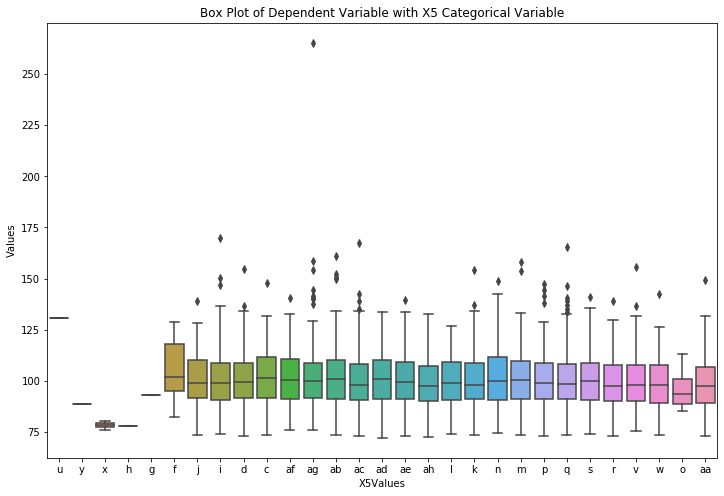

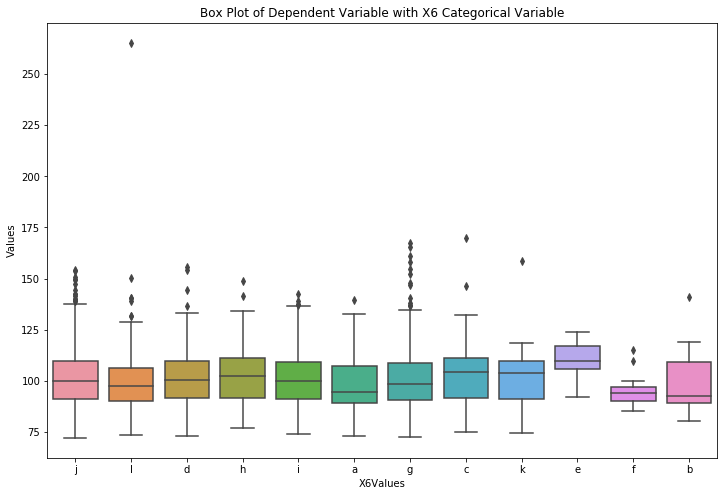

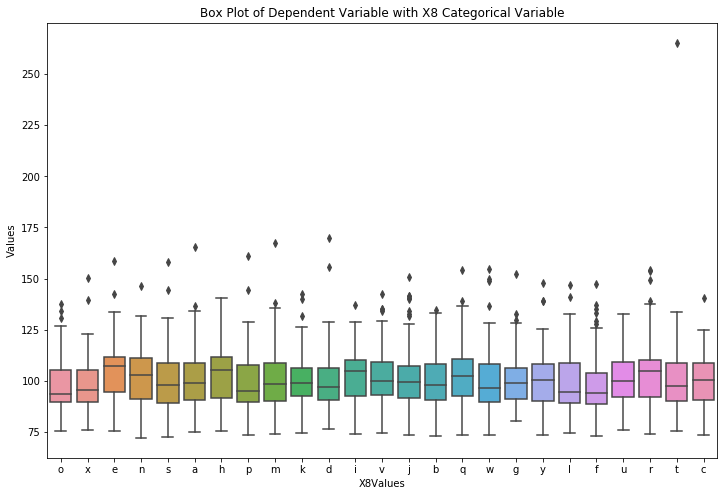

In [5]:
for i in list(train_df.columns):
    if(train_df[i].dtypes==np.object):
        plt.figure(figsize=(12,8))
        sns.boxplot(y=train_df['y'],x=train_df[i])
        plt.xlabel(i + "Values")
        plt.ylabel("Values")
        plt.title("Box Plot of Dependent Variable with "+ i + " Categorical Variable")

1. By this we observed that, X4 has very low variance as compared to other features.

### Binary Variables feature analysis

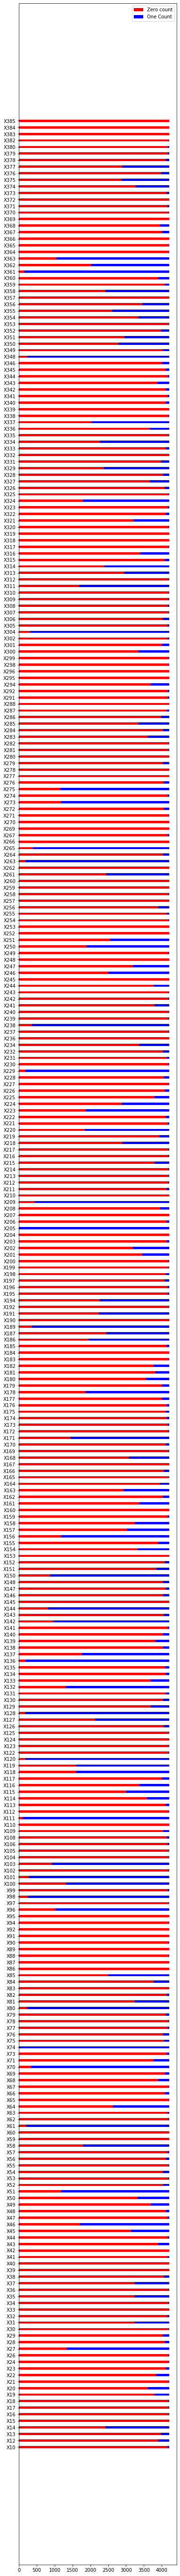

In [6]:
# https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-mercedes/notebook
zero_count_list = []
one_count_list = []
cols_list = unique_values_dict['[0, 1]']
for col in cols_list:
    zero_count_list.append((train_df[col]==0).sum())
    one_count_list.append((train_df[col]==1).sum())

N = len(cols_list)
ind = np.arange(N)
width = 0.35

plt.figure(figsize=(6,100))
p1 = plt.barh(ind, zero_count_list, width, color='red')
p2 = plt.barh(ind, one_count_list, width, left=zero_count_list, color="blue")
plt.yticks(ind, cols_list)
plt.legend((p1[0], p2[0]), ('Zero count', 'One Count'))
plt.show()

1. From the above plot, we observed that, there are many variables which have very low variance.
2. There are features also, which have constant values.

### Target Variable Analysis

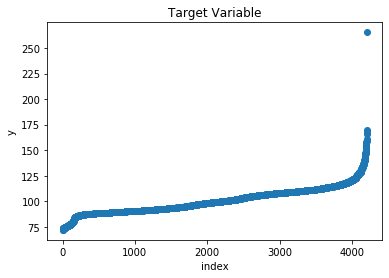

In [7]:
plt.scatter(range(train_df.shape[0]),np.sort(train_df["y"]))
plt.title("Target Variable")
plt.xlabel("index")
plt.ylabel("y")
plt.show()

We are taking threshold of target variable as 150

In [8]:
train_df_modified = train_df[train_df["y"]<150]

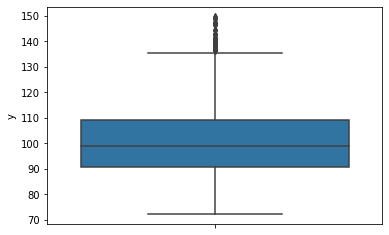

In [9]:
sns.boxplot(y=train_df_modified["y"])
plt.show()

### Check for duplicate features

In [10]:
rem_cols = []
dups = list(train_df_modified.T.index[train_df_modified.T.duplicated(keep="first")].values)
print(dups)
rem_cols.extend(dups)

['X35', 'X37', 'X39', 'X76', 'X84', 'X93', 'X94', 'X102', 'X107', 'X113', 'X119', 'X122', 'X134', 'X146', 'X147', 'X172', 'X199', 'X213', 'X214', 'X216', 'X222', 'X226', 'X227', 'X232', 'X233', 'X235', 'X239', 'X242', 'X243', 'X244', 'X245', 'X247', 'X248', 'X253', 'X254', 'X262', 'X266', 'X268', 'X279', 'X289', 'X290', 'X293', 'X296', 'X297', 'X299', 'X302', 'X320', 'X324', 'X326', 'X330', 'X339', 'X347', 'X360', 'X364', 'X365', 'X382', 'X385']


In [11]:
train_df["X4"].value_counts()

d    4205
a       2
b       1
c       1
Name: X4, dtype: int64

In [12]:
df_num = train_df_modified.loc[:,train_df_modified.dtypes==np.int64]

In [13]:
# removing features with 0 variance
temp = []
for i in df_num.columns:
    if train_df_modified[i].var()==0:
        temp.append(i)
        
print(len(temp))
print(temp)

13
['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X339', 'X347']


In [14]:
rem_cols.extend(temp)
rem_cols = list(set(rem_cols))
rem_cols.append("X4")
print(train_df_modified.shape)
train_df_modified = train_df_modified.drop(rem_cols, axis=1)
print(train_df_modified.shape)

(4194, 378)
(4194, 319)


In [15]:
print("Number of removed features: ",train_df.shape[1] - train_df_modified.shape[1])

Number of removed features:  59


In [16]:
Y_train = train_df_modified["y"]

In [17]:
train_df_modified.drop(columns=["y"], axis=1, inplace=True)
X_train = train_df_modified

In [18]:
train_df_modified.shape

(4194, 318)

In [19]:
X_train_cat = train_df_modified.loc[:,train_df_modified.dtypes==np.object]
X_train_cat.shape

(4194, 7)

In [20]:
X_train_cat.head()

,X0,X1,X2,X3,X5,X6,X8
0,k,v,at,a,u,j,o
1,k,t,av,e,y,l,o
2,az,w,n,c,x,j,x
3,az,t,n,f,x,l,e
4,az,v,n,f,h,d,n


In [21]:
X_train_num = train_df_modified.loc[:,train_df_modified.dtypes==np.int64]

In [22]:
X_train_num.shape

(4194, 311)

In [23]:
X_train_num.drop(columns=["ID"], inplace=True)

In [24]:
X_train_num.head()

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X373,X374,X375,X376,X377,X378,X379,X380,X383,X384
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Preparing Test Dataset

In [25]:
test_df = pd.read_csv("test.csv")

In [26]:
print(test_df.shape)
test_df.head()

(4209, 377)


,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [27]:
ID = test_df["ID"]

In [28]:
test_df.drop(columns=["ID"], inplace=True)

In [29]:
X_test = test_df

In [30]:
test_df_modified = test_df.drop(rem_cols, axis=1)
test_df_modified.shape

(4209, 317)

In [31]:
X_test_cat = test_df_modified.loc[:,test_df.dtypes==np.object]
X_test_cat.shape

(4209, 7)

In [32]:
X_test_num = test_df_modified.loc[:,test_df.dtypes==np.int64]
X_test_num.shape

(4209, 310)

## Featurization

### Label Encoding

In [33]:
# https://scikit-learn-general.narkive.com/iilwOx3l/labelencoder-with-never-seen-before-values
vectorizer = LabelEncoder()
vectorizer.fit(X_train['X0'])
X_test['X0'] = X_test['X0'].map(lambda s: '<unknown>' if s not in vectorizer.classes_ else s)
vectorizer.classes_ = np.append(vectorizer.classes_, '<unknown>')
X_train['X0'] = vectorizer.transform(X_train['X0'])
X_test['X0'] = vectorizer.transform(X_test['X0'])

vectorizer.fit(X_train['X1'])
X_test['X1'] = X_test['X1'].map(lambda s: '<unknown>' if s not in vectorizer.classes_ else s)
vectorizer.classes_ = np.append(vectorizer.classes_, '<unknown>')
X_train['X1'] = vectorizer.transform(X_train['X1'])
X_test['X1'] = vectorizer.transform(X_test['X1'])


vectorizer.fit(X_train['X2'])
X_test['X2'] = X_test['X2'].map(lambda s: '<unknown>' if s not in vectorizer.classes_ else s)
vectorizer.classes_ = np.append(vectorizer.classes_, '<unknown>')
X_train['X2'] = vectorizer.transform(X_train['X2'])
X_test['X2'] = vectorizer.transform(X_test['X2'])


vectorizer.fit(X_train['X3'])
X_test['X3'] = X_test['X3'].map(lambda s: '<unknown>' if s not in vectorizer.classes_ else s)
vectorizer.classes_ = np.append(vectorizer.classes_, '<unknown>')
X_train['X3'] = vectorizer.transform(X_train['X3'])
X_test['X3'] = vectorizer.transform(X_test['X3'])


vectorizer.fit(X_train['X5'])
X_test['X5'] = X_test['X5'].map(lambda s: '<unknown>' if s not in vectorizer.classes_ else s)
vectorizer.classes_ = np.append(vectorizer.classes_, '<unknown>')
X_train['X5'] = vectorizer.transform(X_train['X5'])
X_test['X5'] = vectorizer.transform(X_test['X5'])

vectorizer.fit(X_train['X6'])
X_test['X6'] = X_test['X6'].map(lambda s: '<unknown>' if s not in vectorizer.classes_ else s)
vectorizer.classes_ = np.append(vectorizer.classes_, '<unknown>')
X_train['X6'] = vectorizer.transform(X_train['X6'])
X_test['X6'] = vectorizer.transform(X_test['X6'])


vectorizer.fit(X_train['X8'])
X_test['X8'] = X_test['X8'].map(lambda s: '<unknown>' if s not in vectorizer.classes_ else s)
vectorizer.classes_ = np.append(vectorizer.classes_, '<unknown>')
X_train['X8'] = vectorizer.transform(X_train['X8'])
X_test['X8'] = vectorizer.transform(X_test['X8'])

In [34]:
X_train_x0_le = (X_train['X0'].values).reshape(len(X_train),1)
X_test_x0_le = (X_test['X0'].values).reshape(len(X_test),1)

X_train_x1_le = (X_train['X1'].values).reshape(len(X_train),1)
X_test_x1_le = (X_test['X1'].values).reshape(len(X_test),1)

X_train_x2_le = (X_train['X2'].values).reshape(len(X_train),1)
X_test_x2_le = (X_test['X2'].values).reshape(len(X_test),1)

X_train_x3_le = (X_train['X3'].values).reshape(len(X_train),1)
X_test_x3_le = (X_test['X3'].values).reshape(len(X_test),1)

X_train_x5_le = (X_train['X5'].values).reshape(len(X_train),1)
X_test_x5_le = (X_test['X5'].values).reshape(len(X_test),1)

X_train_x6_le = (X_train['X6'].values).reshape(len(X_train),1)
X_test_x6_le = (X_test['X6'].values).reshape(len(X_test),1)

X_train_x8_le = (X_train['X8'].values).reshape(len(X_train),1)
X_test_x8_le = (X_test['X8'].values).reshape(len(X_test),1)

In [35]:
from scipy.sparse import hstack
print('Combining Categorical Variable in matrix:')
X_train_cat_le = np.concatenate((X_train_x0_le,X_train_x1_le,X_train_x2_le,X_train_x3_le,X_train_x5_le,X_train_x6_le,X_train_x8_le),axis=1)
print(X_train_cat_le.shape)
X_test_cat_le = np.concatenate((X_test_x0_le,X_test_x1_le,X_test_x2_le,X_test_x3_le,X_test_x5_le,X_test_x6_le,X_test_x8_le),axis=1)
print(X_test_cat_le.shape)

Combining Categorical Variable in matrix:
(4194, 7)
(4209, 7)


In [36]:
normalizer = Normalizer()
X_train_cat_le = normalizer.fit_transform(X_train_cat_le)
X_test_cat_le = normalizer.transform(X_test_cat_le)

In [37]:
from scipy.sparse import hstack
print('Final label feature matrix:')
X_train_le = hstack((X_train_cat_le,X_train_num)).tocsr()
print(X_train_le.shape)
X_test_le = hstack((X_test_cat_le,X_test_num)).tocsr()
print(X_test_le.shape)

Final label feature matrix:
(4194, 317)
(4209, 317)


### Adding PCA Features

In [38]:
standardized_data_tr = StandardScaler().fit_transform(X_train_num)
standardized_data_te = StandardScaler().fit_transform(X_test_num)
print(standardized_data_tr.shape)
print(standardized_data_te.shape)

(4194, 310)
(4209, 310)


In [39]:
# https://blog.goodaudience.com/stacking-ml-algorithm-for-mercedes-benz-greener-manufacturing-competition-5600762186ae
# https://medium.com/@williamkoehrsen/capstone-project-mercedes-benz-greener-manufacturing-competition-4798153e2476
pca = PCA()
pca.n_components = 6
print("Before Transformation: ")
print(standardized_data_tr.shape)
print(standardized_data_te.shape)
pca_data_tr = pca.fit_transform(standardized_data_tr)
pca_data_te = pca.transform(standardized_data_te)
print("After Transformation:")
print(pca_data_tr.shape)
print(pca_data_te.shape)

Before Transformation: 
(4194, 310)
(4209, 310)
After Transformation:
(4194, 6)
(4209, 6)


In [40]:
train_df_modified_pca = train_df_modified.copy()
train_df_modified_pca["PCA_1"] = pca_data_tr[:,0]
train_df_modified_pca["PCA_2"] = pca_data_tr[:,1]
train_df_modified_pca["PCA_3"] = pca_data_tr[:,2]
train_df_modified_pca["PCA_4"] = pca_data_tr[:,3]
train_df_modified_pca["PCA_5"] = pca_data_tr[:,4]
train_df_modified_pca["PCA_6"] = pca_data_tr[:,5]
test_df_modified_pca = test_df_modified.copy()
test_df_modified_pca["PCA_1"] = pca_data_te[:,0]
test_df_modified_pca["PCA_2"] = pca_data_te[:,1]
test_df_modified_pca["PCA_3"] = pca_data_te[:,2]
test_df_modified_pca["PCA_4"] = pca_data_te[:,3]
test_df_modified_pca["PCA_5"] = pca_data_te[:,4]
test_df_modified_pca["PCA_6"] = pca_data_te[:,5]

### Label Encoding + PCA components

In [41]:
print('Label + PCA matrix:')
X_train_le_PCA = hstack((X_train_le,pca_data_tr)).tocsr()
print(X_train_le_PCA.shape)
X_test_le_PCA = hstack((X_test_le,pca_data_te)).tocsr()
print(X_test_le_PCA.shape)

Label + PCA matrix:
(4194, 323)
(4209, 323)


### Featurizing 2-way and 3-way feature interaction

In [42]:
# https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/discussion/37700
# https://www.kaggle.com/anubhav3377/17th-place-solution-private-score-0-55378
# taking X314 and X315
train_df_modified["X314_plus_X315"] = train_df_modified.apply(lambda row: row.X314 + row.X315, axis=1)
test_df_modified['X314_plus_X315'] = test_df_modified.apply(lambda row: row.X314 + row.X315, axis=1)
train_df_modified_pca['X314_plus_X315'] = train_df_modified.apply(lambda row: row.X314 + row.X315, axis=1)
test_df_modified_pca['X314_plus_X315'] = test_df_modified.apply(lambda row: row.X314 + row.X315, axis=1)

In [43]:
print("correlation between X314_plus_X315 with y is: ",Y_train.corr(train_df_modified["X314_plus_X315"]))

correlation between X314_plus_X315 with y is:  0.6990819224017307


In [44]:
# taking X314, X315 and X118
train_df_modified['X118_plus_X314_plus_X315'] = train_df_modified.apply(lambda row: row.X118 + row.X314 + row.X315, axis=1)
test_df_modified['X118_plus_X314_plus_X315'] = test_df_modified.apply(lambda row: row.X118 + row.X314 + row.X315, axis=1)
train_df_modified_pca['X118_plus_X314_plus_X315'] = train_df_modified.apply(lambda row: row.X118 + row.X314 + row.X315, axis=1)
test_df_modified_pca['X118_plus_X314_plus_X315'] = test_df_modified.apply(lambda row: row.X118 + row.X314 + row.X315, axis=1)

In [45]:
print("Correalation between X118_plus_X314_plus_X315 and y is :  ",Y_train.corr(train_df_modified['X118_plus_X314_plus_X315']))

Correalation between X118_plus_X314_plus_X315 and y is :   0.6837266223799761


In [46]:
# taking X118 and X263
train_df_modified['X118_plus_X263'] = train_df_modified.apply(lambda row: row.X118 + row.X263, axis=1)
test_df_modified['X118_plus_X263'] = test_df_modified.apply(lambda row: row.X118 + row.X263, axis=1)
train_df_modified_pca['X118_plus_X263'] = train_df_modified.apply(lambda row: row.X118 + row.X263, axis=1)
test_df_modified_pca['X118_plus_X263'] = test_df_modified.apply(lambda row: row.X118 + row.X263, axis=1)

In [47]:
print("Correalation between X118_plus_X263 and y is :  ",Y_train.corr(train_df_modified['X118_plus_X263']))

Correalation between X118_plus_X263 and y is :   0.3864652751823678


In [48]:
# taking X29, X118 and X263
train_df_modified['X29_plus_X118_plus_X263'] = train_df_modified.apply(lambda row: row.X29 + row.X118 + row.X263, axis=1)
test_df_modified['X29_plus_X118_plus_X263'] = test_df_modified.apply(lambda row: row.X29 + row.X118 + row.X263, axis=1)
train_df_modified_pca['X29_plus_X118_plus_X263'] = train_df_modified.apply(lambda row: row.X29 + row.X118 + row.X263, axis=1)
test_df_modified_pca['X29_plus_X118_plus_X263'] = test_df_modified.apply(lambda row: row.X29 + row.X118 + row.X263, axis=1)

In [49]:
print("Correalation between X29_plus_X118_plus_X263 and y is :  ",Y_train.corr(train_df_modified['X29_plus_X118_plus_X263']))

Correalation between X29_plus_X118_plus_X263 and y is :   0.2911340078121632


### Adding interaction features to label encoding features

In [50]:
print('interaction + label Matrix:')
X_train_le_corr = hstack((X_train_le,train_df_modified['X314_plus_X315'].values.reshape(-1,1),train_df_modified['X118_plus_X314_plus_X315'].values.reshape(-1,1),train_df_modified['X118_plus_X263'].values.reshape(-1,1),train_df_modified['X29_plus_X118_plus_X263'].values.reshape(-1,1))).tocsr()
print(X_train_le_corr.shape)
X_test_le_corr = hstack((X_test_le,test_df_modified['X314_plus_X315'].values.reshape(-1,1),test_df_modified['X118_plus_X314_plus_X315'].values.reshape(-1,1),test_df_modified['X118_plus_X263'].values.reshape(-1,1),test_df_modified['X29_plus_X118_plus_X263'].values.reshape(-1,1))).tocsr()
print(X_test_le_corr.shape)

interaction + label Matrix:
(4194, 321)
(4209, 321)


### Adding interaction features to label encoding features

In [51]:
print('interaction + label + PCA Matrix:')
X_train_le_PCA_corr = hstack((X_train_le_PCA,train_df_modified['X314_plus_X315'].values.reshape(-1,1),train_df_modified['X118_plus_X314_plus_X315'].values.reshape(-1,1),train_df_modified['X118_plus_X263'].values.reshape(-1,1),train_df_modified['X29_plus_X118_plus_X263'].values.reshape(-1,1))).tocsr()
print(X_train_le_PCA_corr.shape)
X_test_le_PCA_corr = hstack((X_test_le_PCA,test_df_modified['X314_plus_X315'].values.reshape(-1,1),test_df_modified['X118_plus_X314_plus_X315'].values.reshape(-1,1),test_df_modified['X118_plus_X263'].values.reshape(-1,1),test_df_modified['X29_plus_X118_plus_X263'].values.reshape(-1,1))).tocsr()
print(X_test_le_PCA_corr.shape)

interaction + label + PCA Matrix:
(4194, 327)
(4209, 327)


### We have total of 4 featured dataset:

##### Label Encoding Features:
1. X_train_le
2. X_test_le

##### Label Encoding + PCA Components Features:
1. X_train_le_PCA
2. X_test_le_PCA

##### Label Encoding + Interaction Features:
1. X_train_le_corr
2. X_test_le_corr


##### Label Encoding + PCA +  Interaction Features:
1. X_train_le_PCA_corr
2. X_test_le_PCA_corr

# Modelling

## Baseline Model - Linear Regression

In [52]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

### Label Encoding

In [53]:
model_lr = LinearRegression(n_jobs=-1)
model_lr.fit(X_train_le,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [54]:
pred_test_lr = model_lr.predict(X_test_le)

In [55]:
submission_lr = pd.DataFrame()
submission_lr["ID"] = ID
submission_lr["y"] = pred_test_lr
submission_lr.to_csv("submission_lr_le.csv", index = False)

### Label Encoding + PCA

In [56]:
model_lr = LinearRegression(n_jobs=-1)
model_lr.fit(X_train_le_PCA,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [57]:
pred_test_lr_PCA = model_lr.predict(X_test_le_PCA)

In [58]:
submission_lr = pd.DataFrame()
submission_lr["ID"] = ID
submission_lr["y"] = pred_test_lr_PCA
submission_lr.to_csv("submission_lr_le_PCA.csv", index = False)

### Label Encoding + Interaction Features

In [59]:
model_lr = LinearRegression(n_jobs=-1)
model_lr.fit(X_train_le_corr,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [60]:
pred_test_lr_corr = model_lr.predict(X_test_le_corr)

In [61]:
submission_lr = pd.DataFrame()
submission_lr["ID"] = ID
submission_lr["y"] = pred_test_lr_corr
submission_lr.to_csv("submission_lr_le_corr.csv", index = False)

### Label Encoding + PCA + Interaction Features

In [62]:
model_lr = LinearRegression(n_jobs=-1)
model_lr.fit(X_train_le_PCA_corr,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [63]:
pred_test_lr_PCA_corr = model_lr.predict(X_test_le_PCA_corr)

In [64]:
submission_lr = pd.DataFrame()
submission_lr["ID"] = ID
submission_lr["y"] = pred_test_lr_PCA_corr
submission_lr.to_csv("submission_lr_le_PCA_corr.csv", index = False)

#### Summary of baseline Models

In [65]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model Name","Private Score", "Public Score"]

x.add_row(["Linear Regression + label encoding", 0.50947, 0.51970])
x.add_row(["Linear Regression + label encoding + PCA", 0.50998, 0.51842])
x.add_row(["Linear regression + label encoding + interaction features", 0.50994, 0.51990])
x.add_row(["Linear Regression + label encoding + PCA + interaction features", 0.51050, 0.51850])


print(x)

+-----------------------------------------------------------------+---------------+--------------+
|                            Model Name                           | Private Score | Public Score |
+-----------------------------------------------------------------+---------------+--------------+
|                Linear Regression + label encoding               |    0.50947    |    0.5197    |
|             Linear Regression + label encoding + PCA            |    0.50998    |   0.51842    |
|    Linear regression + label encoding + interaction features    |    0.50994    |    0.5199    |
| Linear Regression + label encoding + PCA + interaction features |     0.5105    |    0.5185    |
+-----------------------------------------------------------------+---------------+--------------+


# Complex Modelling

## RandomForestRegressor

### Label Encoding

In [66]:
from sklearn.ensemble import RandomForestRegressor

neigh=RandomForestRegressor(random_state=42, n_jobs=-1)
parameters = {'n_estimators':[100,150,200,300,350,500],
             'max_depth':[1,2,3,5,7,10],
             'min_samples_split':[2,3,4,5,6,7,8,9,10],
             'max_features': [0.95],
             'min_samples_leaf': [1, 2,3,4,5,6,7,8,9],
             'random_state':[30,42]}
clf=RandomizedSearchCV(neigh,parameters,cv=10,scoring='r2',return_train_score=True,n_jobs=-1,verbose=5)
clf.fit(X_train_le,Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.5min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                  

In [67]:
results = pd.DataFrame.from_dict(clf.cv_results_)
train_r2 = results["mean_train_score"]
cv_r2 = results["mean_test_score"]

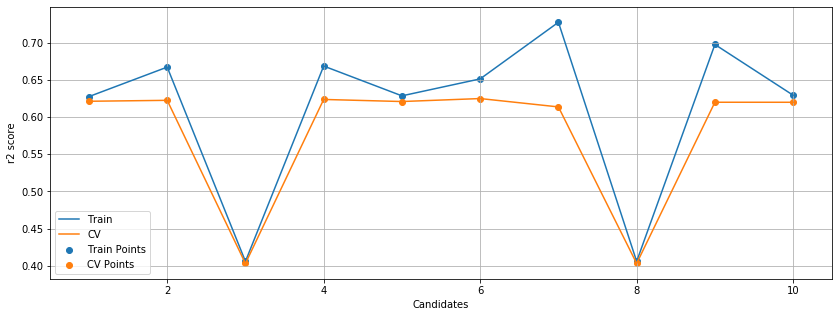

The Best Score 0.6249345936040128


In [68]:
# https://medium.com/@shibam.kiit399/mercedes-benz-greener-manufacturing-getting-into-top-50-4226c41d71f
candidates = list(range(1,11))
plt.figure(figsize=(14,5))
plt.plot(candidates,train_r2,label='Train')
plt.plot(candidates,cv_r2,label='CV')
plt.scatter(candidates,train_r2,label='Train Points')
plt.scatter(candidates, cv_r2, label='CV Points')
plt.xlabel("Candidates")
plt.ylabel("r2 score")
plt.grid()
plt.legend()
plt.show()
print("The Best Score",clf.best_score_)

In [69]:
clf.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features=0.95, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=-1, oob_score=False,
                      random_state=30, verbose=0, warm_start=False)

In [70]:
model_rf = clf.best_estimator_
model_rf.fit(X_train_le,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features=0.95, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=-1, oob_score=False,
                      random_state=30, verbose=0, warm_start=False)

In [71]:
pred_test_rf = model_rf.predict(X_test_le)

In [72]:
submission_rf = pd.DataFrame()
submission_rf["ID"] = ID
submission_rf["y"] = pred_test_rf
submission_rf.to_csv("submission_rf_le.csv",index=False)

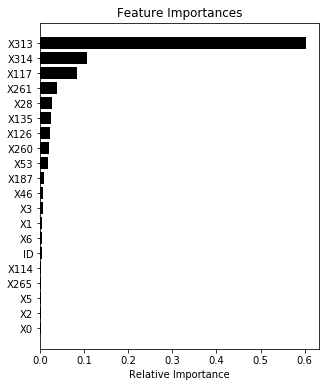

In [73]:
# https://stackoverflow.com/questions/44101458/random-forest-feature-importance-chart-using-python
features = train_df_modified.columns
importances = model_rf.feature_importances_
indices = (np.argsort(importances))[-20:]
plt.figure(figsize=(5,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='k', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

We can clearly see that, all the categorical features have very less feature importance. 

### Label Encoding + PCA

In [74]:
%%time
neigh=RandomForestRegressor(random_state=42, n_jobs=-1)
parameters = {'n_estimators':[100,150,200,300,350,500],
             'max_depth':[1,2,3,5,7,10],
             'min_samples_split':[2,3,4,5,6,7,8,9,10],
             'max_features': [0.95],
             'min_samples_leaf': [1, 2,3,4,5,6,7,8,9],
             'random_state':[30,42]}
clf=RandomizedSearchCV(neigh,parameters,cv=10,scoring='r2',return_train_score=True,n_jobs=-1,verbose=5)
clf.fit(X_train_le_PCA,Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.6min finished


CPU times: user 7.68 s, sys: 82.8 ms, total: 7.76 s
Wall time: 3min 40s


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                  

In [75]:
results = pd.DataFrame.from_dict(clf.cv_results_)
train_r2 = results["mean_train_score"]
cv_r2 = results["mean_test_score"]

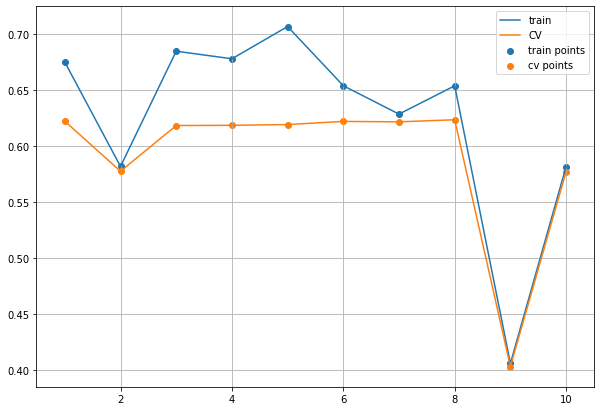

0.6232656373790332


In [76]:
candidates = list(range(1,11))
plt.figure(figsize=(10, 7))
plt.plot(candidates, train_r2, label="train")
plt.plot(candidates, cv_r2, label="CV")
plt.scatter(candidates, train_r2, label="train points")
plt.scatter(candidates, cv_r2, label="cv points")
plt.legend()
plt.grid()
plt.show()
print(clf.best_score_)

In [77]:
clf.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features=0.95, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=30, verbose=0, warm_start=False)

In [78]:
model_rf_le_pca = clf.best_estimator_
model_rf_le_pca.fit(X_train_le_PCA, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features=0.95, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=30, verbose=0, warm_start=False)

In [79]:
pred_test_rf = model_rf_le_pca.predict(X_test_le_PCA)

In [80]:
submission_rf = pd.DataFrame()
submission_rf["ID"] = ID
submission_rf["y"] = pred_test_rf
submission_rf.to_csv("submission_rf_le_PCA.csv",index=False)

### Label Encoding + Interaction Features

In [81]:
%%time
neigh=RandomForestRegressor(random_state=42, n_jobs=-1)
parameters = {'n_estimators':[100,150,200,300,350,500],
             'max_depth':[1,2,3,5,7,10],
             'min_samples_split':[2,3,4,5,6,7,8,9,10],
             'max_features': [0.95],
             'min_samples_leaf': [1, 2,3,4,5,6,7,8,9],
             'random_state':[30,42]}
clf=RandomizedSearchCV(neigh,parameters,cv=10,scoring='r2',return_train_score=True,n_jobs=-1,verbose=5)
clf.fit(X_train_le_corr,Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.4min finished


CPU times: user 44 s, sys: 169 ms, total: 44.2 s
Wall time: 4min 31s


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                  

In [82]:
results = pd.DataFrame.from_dict(clf.cv_results_)
train_r2 = results["mean_train_score"]
cv_r2 = results["mean_test_score"]

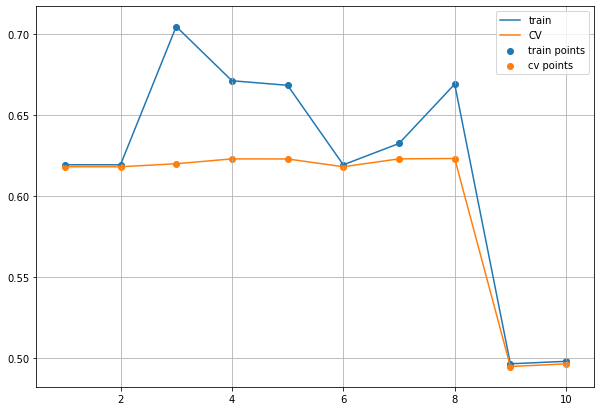

0.6233284889952542


In [83]:
candidates = list(range(1,11))
plt.figure(figsize=(10, 7))
plt.plot(candidates, train_r2, label="train")
plt.plot(candidates, cv_r2, label="CV")
plt.scatter(candidates, train_r2, label="train points")
plt.scatter(candidates, cv_r2, label="cv points")
plt.legend()
plt.grid()
plt.show()
print(clf.best_score_)

In [84]:
clf.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features=0.95, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=8,
                      min_samples_split=6, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=30, verbose=0, warm_start=False)

In [85]:
model_rf_le_corr = clf.best_estimator_
model_rf_le_corr.fit(X_train_le_corr, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features=0.95, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=8,
                      min_samples_split=6, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=30, verbose=0, warm_start=False)

In [86]:
pred_test_rf = model_rf_le_corr.predict(X_test_le_corr)

In [87]:
submission_rf = pd.DataFrame()
submission_rf["ID"] = ID
submission_rf["y"] = pred_test_rf
submission_rf.to_csv("submission_rf_le_corr.csv",index=False)

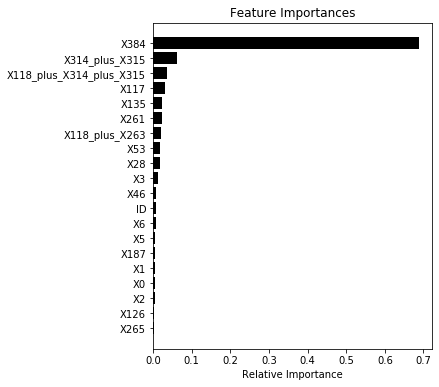

In [176]:
features = train_df_modified.columns
importances = model_rf_le_corr.feature_importances_
indices = (np.argsort(importances))[-20:]
plt.figure(figsize=(5,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='k', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Interaction features contributes a lot, where as categorical features have very less importance.

### Label Encoding + PCA + Interaction Features

In [88]:
%%time
neigh=RandomForestRegressor(random_state=42, n_jobs=-1)
parameters = {'n_estimators':[100,150,200,300,350,500],
             'max_depth':[1,2,3,5,7,10],
             'min_samples_split':[2,3,4,5,6,7,8,9,10],
             'max_features': [0.95],
             'min_samples_leaf': [1, 2,3,4,5,6,7,8,9],
             'random_state':[30,42]}
clf=RandomizedSearchCV(neigh,parameters,cv=10,scoring='r2',return_train_score=True,n_jobs=-1,verbose=5)
clf.fit(X_train_le_PCA_corr,Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.7min finished


CPU times: user 20.3 s, sys: 110 ms, total: 20.4 s
Wall time: 1min 45s


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                  

In [89]:
results = pd.DataFrame.from_dict(clf.cv_results_)
train_r2 = results["mean_train_score"]
cv_r2 = results["mean_test_score"]

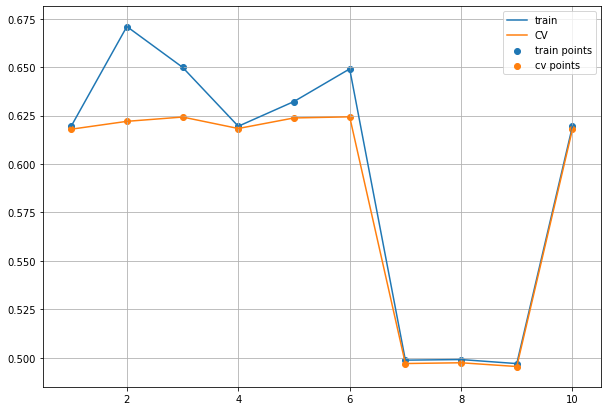

0.6243435648027174


In [90]:
candidates = list(range(1,11))
plt.figure(figsize=(10, 7))
plt.plot(candidates, train_r2, label="train")
plt.plot(candidates, cv_r2, label="CV")
plt.scatter(candidates, train_r2, label="train points")
plt.scatter(candidates, cv_r2, label="cv points")
plt.legend()
plt.grid()
plt.show()
print(clf.best_score_)

In [91]:
clf.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features=0.95, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=8,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [92]:
model_rf_le_PCA_corr = clf.best_estimator_
model_rf_le_PCA_corr.fit(X_train_le_PCA_corr, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features=0.95, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=8,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [93]:
pred_test_rf = model_rf_le_PCA_corr.predict(X_test_le_PCA_corr)

In [94]:
submission_rf = pd.DataFrame()
submission_rf["ID"] = ID
submission_rf["y"] = pred_test_rf
submission_rf.to_csv("submission_rf_le_PCA_corr.csv",index=False)

### Summary of Random Forest Models

In [95]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model Name","Private Score", "Public Score"]

x.add_row(["RF + label encoding", 0.54949, 0.55709])
x.add_row(["RF + label encoding + PCA", 0.55032, 0.55684])
x.add_row(["RF + label encoding + interaction features", 0.55080, 0.55774])
x.add_row(["RF + label encoding + PCA + interaction features", 0.55148, 0.55912])


print(x)

+--------------------------------------------------+---------------+--------------+
|                    Model Name                    | Private Score | Public Score |
+--------------------------------------------------+---------------+--------------+
|               RF + label encoding                |    0.54949    |   0.55709    |
|            RF + label encoding + PCA             |    0.55032    |   0.55684    |
|    RF + label encoding + interaction features    |     0.5508    |   0.55774    |
| RF + label encoding + PCA + interaction features |    0.55148    |   0.55912    |
+--------------------------------------------------+---------------+--------------+


## XGBRegressor

In [96]:
from xgboost import XGBRegressor

### Label Encoding

In [97]:
%%time
neigh=XGBRegressor(random_state=42,n_jobs=-1)
parameters = {'learning_rate':[0.001,0.01,0.05,0.1,1],
             'n_estimators':[100,150,200,500],
             'max_depth':[2,3,5,10],
             'colsample_bytree':[0.1,0.5,0.7,1],
             'subsample':[0.2,0.3,0.5,1],
             'gamma':[1e-2,1e-3,0,0.1,0.01,0.5,1],
             'reg_alpha':[1e-5,1e-3,1e-1,1,1e1]}
clf=RandomizedSearchCV(neigh,parameters,cv=10,scoring='r2',return_train_score=True,n_jobs=-1,verbose=5)
clf.fit(X_train_le,Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.5min finished


[13:04:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 10.2 s, sys: 90.9 ms, total: 10.3 s
Wall time: 1min 30s


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=-1, nthread=None,
                                          objective='reg:linear',
                                          random_state=42, reg_alp...
                   param_distributions={'colsample_bytree': [0.1, 0.5, 0.7, 1],
                                        'gamma': [0.01, 0.001, 0, 0.1, 0.01,
                               

In [98]:
results=pd.DataFrame.from_dict(clf.cv_results_)
train_r2=results['mean_train_score']
cv_r2=results['mean_test_score']

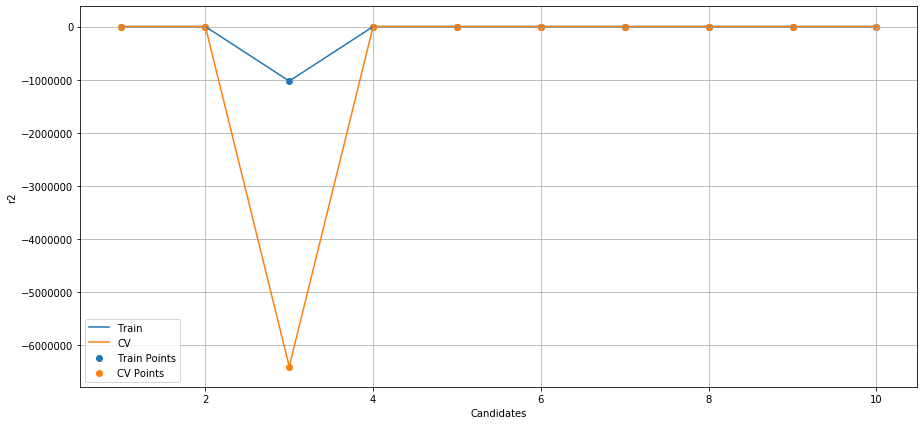

The Best Score 0.6222545255157843


In [99]:
candidates = list(range(1,11))
plt.figure(figsize=(15,7))
plt.plot(candidates,train_r2,label='Train')
plt.plot(candidates,cv_r2,label='CV')
plt.scatter(candidates,train_r2,label='Train Points')
plt.scatter(candidates,cv_r2,label='CV Points')
plt.legend()
plt.xlabel("Candidates")
plt.ylabel("r2")
plt.grid()
plt.show()
print("The Best Score",clf.best_score_)

In [100]:
clf.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.5,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0.001, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [101]:
model_xgb_le = clf.best_estimator_
model_xgb_le.fit(X_train_le, Y_train)

[13:04:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.5,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0.001, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [102]:
pred_test_xgb = model_xgb_le.predict(X_test_le)

In [103]:
submission_xgb = pd.DataFrame()
submission_xgb["ID"] = ID
submission_xgb["y"] = pred_test_xgb
submission_xgb.to_csv("submission_xgb_le.csv",index=False)

### Label Encoding + PCA

In [104]:
%%time
neigh=XGBRegressor(random_state=42,n_jobs=-1)
parameters = {'learning_rate':[0.001,0.01,0.05,0.1,1],
             'n_estimators':[100,150,200,500],
             'max_depth':[2,3,5,10],
             'colsample_bytree':[0.1,0.5,0.7,1],
             'subsample':[0.2,0.3,0.5,1],
             'gamma':[1e-2,1e-3,0,0.1,0.01,0.5,1],
             'reg_alpha':[1e-5,1e-3,1e-1,1,1e1]}
clf=RandomizedSearchCV(neigh,parameters,cv=10,scoring='r2',return_train_score=True,n_jobs=-1,verbose=5)
clf.fit(X_train_le_PCA,Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.8min finished


[13:06:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 14.3 s, sys: 154 ms, total: 14.5 s
Wall time: 1min 51s


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=-1, nthread=None,
                                          objective='reg:linear',
                                          random_state=42, reg_alp...
                   param_distributions={'colsample_bytree': [0.1, 0.5, 0.7, 1],
                                        'gamma': [0.01, 0.001, 0, 0.1, 0.01,
                               

In [105]:
results=pd.DataFrame.from_dict(clf.cv_results_)
train_r2=results['mean_train_score']
cv_r2=results['mean_test_score']

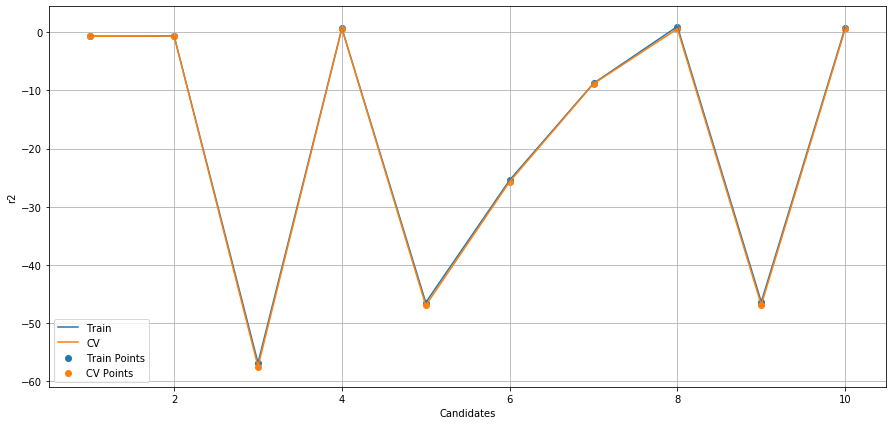

The Best Score 0.6155190810514276


In [106]:
candidates = list(range(1,11))
plt.figure(figsize=(15,7))
plt.plot(candidates,train_r2,label='Train')
plt.plot(candidates,cv_r2,label='CV')
plt.scatter(candidates,train_r2,label='Train Points')
plt.scatter(candidates,cv_r2,label='CV Points')
plt.legend()
plt.xlabel("Candidates")
plt.ylabel("r2")
plt.grid()
plt.show()
print("The Best Score",clf.best_score_)

In [107]:
clf.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.01,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.2, verbosity=1)

In [108]:
model_xgb_le_pca = clf.best_estimator_
model_xgb_le_pca.fit(X_train_le_PCA, Y_train)

[13:06:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.01,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.2, verbosity=1)

In [109]:
pred_test_xgb = model_xgb_le_pca.predict(X_test_le_PCA)

In [110]:
submission_xgb_le_pca = pd.DataFrame()
submission_xgb_le_pca["ID"] = ID
submission_xgb_le_pca["y"] = pred_test_xgb

In [111]:
submission_xgb_le_pca.to_csv("submission_xgb_le_pca.csv",index=False)

### Label Encoding + Interaction Features

In [112]:
%%time
neigh=XGBRegressor(random_state=42,n_jobs=-1)
parameters = {'learning_rate':[0.001,0.01,0.05,0.1,1],
             'n_estimators':[100,150,200,500],
             'max_depth':[2,3,5,10],
             'colsample_bytree':[0.1,0.5,0.7,1],
             'subsample':[0.2,0.3,0.5,1],
             'gamma':[1e-2,1e-3,0,0.1,0.01,0.5,1],
             'reg_alpha':[1e-5,1e-3,1e-1,1,1e1]}
clf=RandomizedSearchCV(neigh,parameters,cv=10,scoring='r2',return_train_score=True,n_jobs=-1,verbose=5)
clf.fit(X_train_le_corr,Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   54.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.2min finished


[13:07:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 21.1 s, sys: 149 ms, total: 21.2 s
Wall time: 1min 14s


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=-1, nthread=None,
                                          objective='reg:linear',
                                          random_state=42, reg_alp...
                   param_distributions={'colsample_bytree': [0.1, 0.5, 0.7, 1],
                                        'gamma': [0.01, 0.001, 0, 0.1, 0.01,
                               

In [113]:
results=pd.DataFrame.from_dict(clf.cv_results_)
train_r2=results['mean_train_score']
cv_r2=results['mean_test_score']

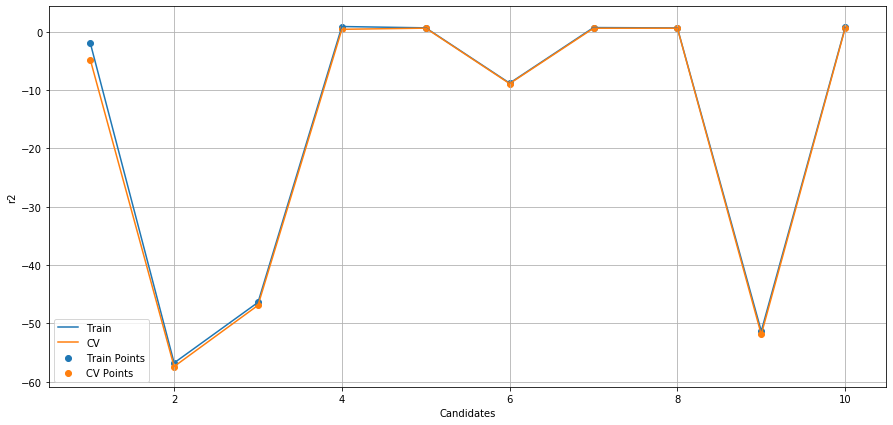

The Best Score 0.6202406588350609


In [114]:
candidates = list(range(1,11))
plt.figure(figsize=(15,7))
plt.plot(candidates,train_r2,label='Train')
plt.plot(candidates,cv_r2,label='CV')
plt.scatter(candidates,train_r2,label='Train Points')
plt.scatter(candidates,cv_r2,label='CV Points')
plt.legend()
plt.xlabel("Candidates")
plt.ylabel("r2")
plt.grid()
plt.show()
print("The Best Score",clf.best_score_)

In [115]:
clf.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0.001, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [116]:
model_xgb_le_corr = clf.best_estimator_
model_xgb_le_corr.fit(X_train_le_corr, Y_train)

[13:07:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0.001, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [117]:
pred_test_xgb = model_xgb_le_corr.predict(X_test_le_corr)

In [118]:
submission_xgb_le_corr = pd.DataFrame()
submission_xgb_le_corr["ID"] = ID
submission_xgb_le_corr["y"] = pred_test_xgb

In [119]:
submission_xgb_le_corr.to_csv("submission_xgb_le_corr.csv", index=False)

### Label Encoding + PCA + interaction features

In [120]:
%%time
neigh=XGBRegressor(random_state=42,n_jobs=-1)
parameters = {'learning_rate':[0.001,0.01,0.05,0.1,1],
             'n_estimators':[100,150,200,500],
             'max_depth':[2,3,5,10],
             'colsample_bytree':[0.1,0.5,0.7,1],
             'subsample':[0.2,0.3,0.5,1],
             'gamma':[1e-2,1e-3,0,0.1,0.01,0.5,1],
             'reg_alpha':[1e-5,1e-3,1e-1,1,1e1]}
clf=RandomizedSearchCV(neigh,parameters,cv=10,scoring='r2',return_train_score=True,n_jobs=-1,verbose=5)
clf.fit(X_train_le_PCA_corr,Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.2min finished


[13:08:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 3.47 s, sys: 129 ms, total: 3.6 s
Wall time: 1min 15s


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=-1, nthread=None,
                                          objective='reg:linear',
                                          random_state=42, reg_alp...
                   param_distributions={'colsample_bytree': [0.1, 0.5, 0.7, 1],
                                        'gamma': [0.01, 0.001, 0, 0.1, 0.01,
                               

In [121]:
results=pd.DataFrame.from_dict(clf.cv_results_)
train_r2=results['mean_train_score']
cv_r2=results['mean_test_score']

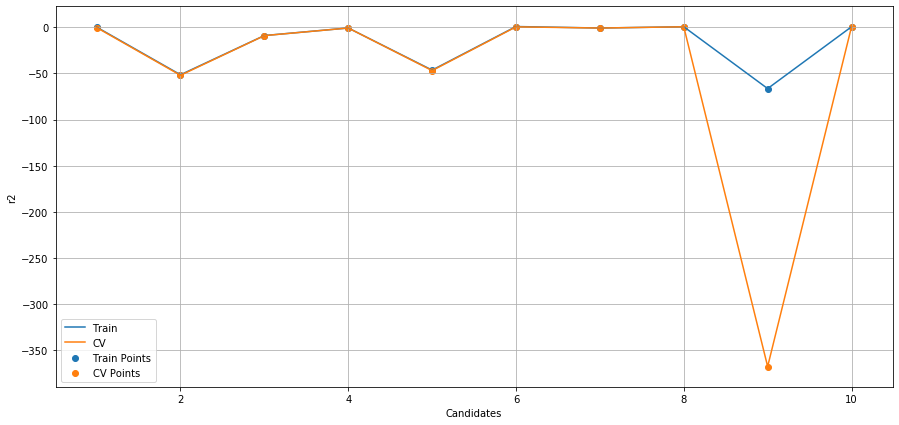

The Best Score 0.6204258456343481


In [122]:
candidates = list(range(1,11))
plt.figure(figsize=(15,7))
plt.plot(candidates,train_r2,label='Train')
plt.plot(candidates,cv_r2,label='CV')
plt.scatter(candidates,train_r2,label='Train Points')
plt.scatter(candidates,cv_r2,label='CV Points')
plt.legend()
plt.xlabel("Candidates")
plt.ylabel("r2")
plt.grid()
plt.show()
print("The Best Score",clf.best_score_)

In [123]:
clf.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.01,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=1, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.5, verbosity=1)

In [124]:
model_xgb_le_pca_corr = clf.best_estimator_
model_xgb_le_pca_corr.fit(X_train_le_PCA_corr, Y_train)

[13:08:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.01,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=1, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.5, verbosity=1)

In [125]:
pred_test_xgb = model_xgb_le_pca_corr.predict(X_test_le_PCA_corr)

In [126]:
submission_xgb_le_pca_corr = pd.DataFrame()
submission_xgb_le_pca_corr["ID"] = ID
submission_xgb_le_pca_corr["y"] = pred_test_xgb

In [127]:
submission_xgb_le_pca_corr.to_csv("submission_xgb_le_pca_corr.csv",index=False)

### Summary of XGBRegressor Models

In [128]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model Name","Private Score", "Public Score"]

x.add_row(["XGB + label encoding", 0.53493, 0.54529])
x.add_row(["XGB + label encoding + PCA", 0.54654, 0.55458])
x.add_row(["XGB + label encoding + interaction features", 0.54345, 0.55114])
x.add_row(["XGB + label encoding + PCA + interaction features", 0.54178, 0.55019])


print(x)

+---------------------------------------------------+---------------+--------------+
|                     Model Name                    | Private Score | Public Score |
+---------------------------------------------------+---------------+--------------+
|                XGB + label encoding               |    0.53493    |   0.54529    |
|             XGB + label encoding + PCA            |    0.54654    |   0.55458    |
|    XGB + label encoding + interaction features    |    0.54345    |   0.55114    |
| XGB + label encoding + PCA + interaction features |    0.54178    |   0.55019    |
+---------------------------------------------------+---------------+--------------+


## ExtraTreeRegressor

### Label Encoding

In [129]:
%%time
neigh=ExtraTreesRegressor(random_state=42, n_jobs=-1)
parameters = {'n_estimators':[150,200,300,350,400,500],
             'max_depth':[2,3,4,5,7,8,10],
             'min_samples_split':[2,3,4,5,6,7,8,10],
             'max_features': [.95],
             'min_samples_leaf': [3,4,5,6,7,8,10],
             'min_impurity_decrease':[1e-5,1e-4,1e-3,1e-2,1e-1,0,1,10,100]}
clf=RandomizedSearchCV(neigh,parameters,cv=10,scoring='r2',return_train_score=True,n_jobs=-1,verbose=5)
clf.fit(X_train_le,Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.4min finished


CPU times: user 15.1 s, sys: 176 ms, total: 15.3 s
Wall time: 3min 23s


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                                 criterion='mse',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=-1,
                                                 oob_score=False,...
                   para

In [130]:
results=pd.DataFrame.from_dict(clf.cv_results_)
train_r2=results['mean_train_score']
cv_r2=results['mean_test_score']

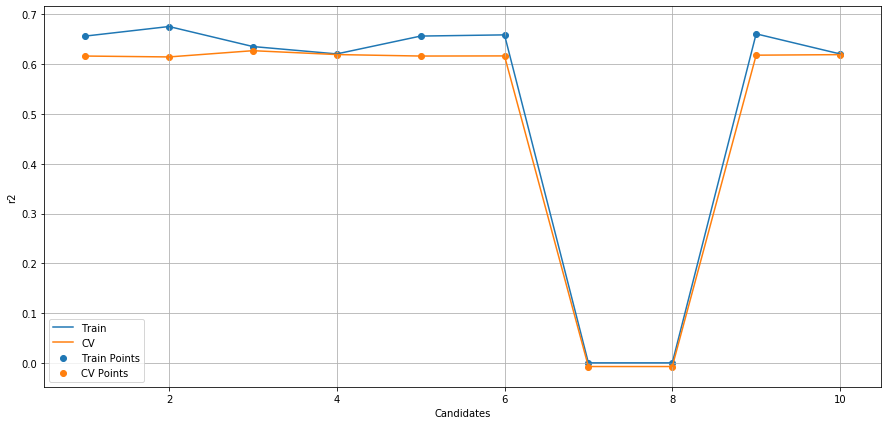

The Best Score 0.62724751842862


In [131]:
candidates = list(range(1,11))
plt.figure(figsize=(15,7))
plt.plot(candidates,train_r2,label='Train')
plt.plot(candidates,cv_r2,label='CV')
plt.scatter(candidates,train_r2,label='Train Points')
plt.scatter(candidates,cv_r2,label='CV Points')
plt.legend()
plt.xlabel("Candidates")
plt.ylabel("r2")
plt.grid()
plt.show()
print("The Best Score",clf.best_score_)

In [132]:
clf.best_estimator_

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=4, max_features=0.95, max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.001,
                    min_impurity_split=None, min_samples_leaf=4,
                    min_samples_split=4, min_weight_fraction_leaf=0.0,
                    n_estimators=400, n_jobs=-1, oob_score=False,
                    random_state=42, verbose=0, warm_start=False)

In [133]:
model_xt_le = clf.best_estimator_
model_xt_le.fit(X_train_le, Y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=4, max_features=0.95, max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.001,
                    min_impurity_split=None, min_samples_leaf=4,
                    min_samples_split=4, min_weight_fraction_leaf=0.0,
                    n_estimators=400, n_jobs=-1, oob_score=False,
                    random_state=42, verbose=0, warm_start=False)

In [134]:
pred_test_xt = model_xt_le.predict(X_test_le)

In [135]:
submission_xt_le = pd.DataFrame()
submission_xt_le["ID"] = ID
submission_xt_le["y"] = pred_test_xt

In [136]:
submission_xt_le.to_csv("submission_xt_le.csv",index=False)

### Label Encoding + PCA

In [137]:
%%time
neigh=ExtraTreesRegressor(random_state=42, n_jobs=-1)
parameters = {'n_estimators':[150,200,300,350,400,500],
             'max_depth':[2,3,4,5,7,8,10],
             'min_samples_split':[2,3,4,5,6,7,8,10],
             'max_features': [.95],
             'min_samples_leaf': [3,4,5,6,7,8,10],
             'min_impurity_decrease':[1e-5,1e-4,1e-3,1e-2,1e-1,0,1,10,100]}
clf=RandomizedSearchCV(neigh,parameters,cv=10,scoring='r2',return_train_score=True,n_jobs=-1,verbose=5)
clf.fit(X_train_le_PCA,Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.9min finished


CPU times: user 19.4 s, sys: 118 ms, total: 19.6 s
Wall time: 4min 59s


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                                 criterion='mse',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=-1,
                                                 oob_score=False,...
                   para

In [138]:
results=pd.DataFrame.from_dict(clf.cv_results_)
train_r2=results['mean_train_score']
cv_r2=results['mean_test_score']

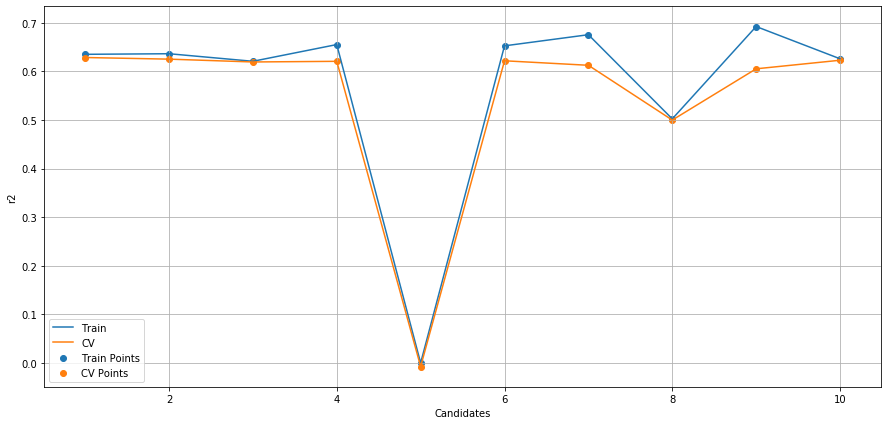

The Best Score 0.6285286882977955


In [139]:
candidates = list(range(1,11))
plt.figure(figsize=(15,7))
plt.plot(candidates,train_r2,label='Train')
plt.plot(candidates,cv_r2,label='CV')
plt.scatter(candidates,train_r2,label='Train Points')
plt.scatter(candidates,cv_r2,label='CV Points')
plt.legend()
plt.xlabel("Candidates")
plt.ylabel("r2")
plt.grid()
plt.show()
print("The Best Score",clf.best_score_)

In [140]:
clf.best_estimator_

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=4, max_features=0.95, max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=1e-05,
                    min_impurity_split=None, min_samples_leaf=6,
                    min_samples_split=5, min_weight_fraction_leaf=0.0,
                    n_estimators=500, n_jobs=-1, oob_score=False,
                    random_state=42, verbose=0, warm_start=False)

In [141]:
model_xt_le_pca = clf.best_estimator_
model_xt_le_pca.fit(X_train_le_PCA, Y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=4, max_features=0.95, max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=1e-05,
                    min_impurity_split=None, min_samples_leaf=6,
                    min_samples_split=5, min_weight_fraction_leaf=0.0,
                    n_estimators=500, n_jobs=-1, oob_score=False,
                    random_state=42, verbose=0, warm_start=False)

In [142]:
pred_test_xt = model_xt_le_pca.predict(X_test_le_PCA)

In [143]:
submission_xt_le_pca = pd.DataFrame()
submission_xt_le_pca["ID"] = ID
submission_xt_le_pca["y"] = pred_test_xt

### Label Encoder + Interaction Features

In [144]:
%%time
neigh=ExtraTreesRegressor(random_state=42, n_jobs=-1)
parameters = {'n_estimators':[150,200,300,350,400,500],
             'max_depth':[2,3,4,5,7,8,10],
             'min_samples_split':[2,3,4,5,6,7,8,10],
             'max_features': [.95],
             'min_samples_leaf': [3,4,5,6,7,8,10],
             'min_impurity_decrease':[1e-5,1e-4,1e-3,1e-2,1e-1,0,1,10,100]}
clf=RandomizedSearchCV(neigh,parameters,cv=10,scoring='r2',return_train_score=True,n_jobs=-1,verbose=5)
clf.fit(X_train_le_corr,Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.9min finished


CPU times: user 11.4 s, sys: 93.1 ms, total: 11.5 s
Wall time: 2min 55s


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                                 criterion='mse',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=-1,
                                                 oob_score=False,...
                   para

In [145]:
results=pd.DataFrame.from_dict(clf.cv_results_)
train_r2=results['mean_train_score']
cv_r2=results['mean_test_score']

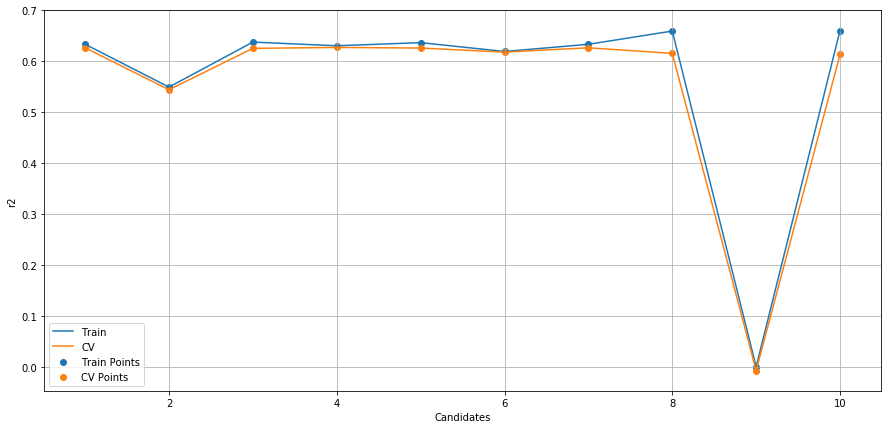

The Best Score 0.6272730424022218


In [146]:
candidates = list(range(1,11))
plt.figure(figsize=(15,7))
plt.plot(candidates,train_r2,label='Train')
plt.plot(candidates,cv_r2,label='CV')
plt.scatter(candidates,train_r2,label='Train Points')
plt.scatter(candidates,cv_r2,label='CV Points')
plt.legend()
plt.xlabel("Candidates")
plt.ylabel("r2")
plt.grid()
plt.show()
print("The Best Score",clf.best_score_)

In [147]:
clf.best_estimator_

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=4, max_features=0.95, max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.1,
                    min_impurity_split=None, min_samples_leaf=10,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=350, n_jobs=-1, oob_score=False,
                    random_state=42, verbose=0, warm_start=False)

In [148]:
model_xt_le_corr = clf.best_estimator_
model_xt_le_corr.fit(X_train_le_corr, Y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=4, max_features=0.95, max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.1,
                    min_impurity_split=None, min_samples_leaf=10,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=350, n_jobs=-1, oob_score=False,
                    random_state=42, verbose=0, warm_start=False)

In [149]:
pred_test_xt = model_xt_le_corr.predict(X_test_le_corr)

In [150]:
submission_xt_le_corr = pd.DataFrame()
submission_xt_le_corr["ID"] = ID
submission_xt_le_corr["y"] = pred_test_xt

In [151]:
submission_xt_le_corr.to_csv("submission_xt_le_corr.csv",index=False)

### Label Encoder + PCA + Interaction Features

In [152]:
%%time
neigh=ExtraTreesRegressor(random_state=42, n_jobs=-1)
parameters = {'n_estimators':[150,200,300,350,400,500],
             'max_depth':[2,3,4,5,7,8,10],
             'min_samples_split':[2,3,4,5,6,7,8,10],
             'max_features': [.95],
             'min_samples_leaf': [3,4,5,6,7,8,10],
             'min_impurity_decrease':[1e-5,1e-4,1e-3,1e-2,1e-1,0,1,10,100]}
clf=RandomizedSearchCV(neigh,parameters,cv=10,scoring='r2',return_train_score=True,n_jobs=-1,verbose=5)
clf.fit(X_train_le_PCA_corr,Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.2min finished


CPU times: user 17.2 s, sys: 90.6 ms, total: 17.3 s
Wall time: 3min 14s


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                                 criterion='mse',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=-1,
                                                 oob_score=False,...
                   para

In [153]:
results=pd.DataFrame.from_dict(clf.cv_results_)
train_r2=results['mean_train_score']
cv_r2=results['mean_test_score']

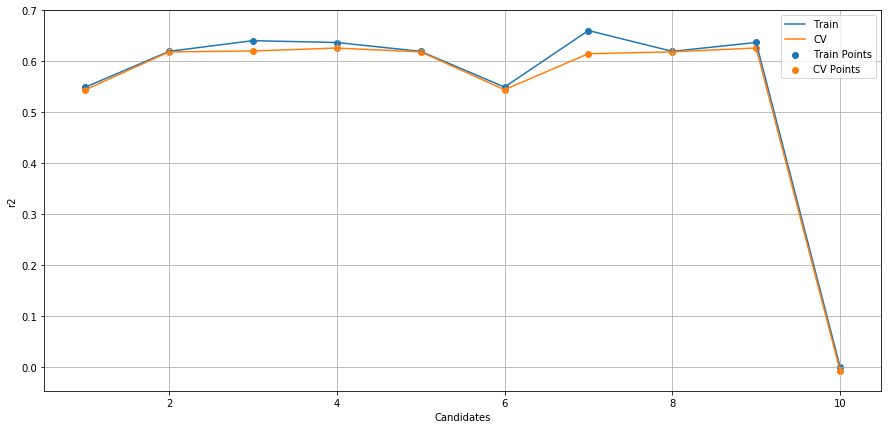

The Best Score 0.6260343625234122


In [154]:
candidates = list(range(1,11))
plt.figure(figsize=(15,7))
plt.plot(candidates,train_r2,label='Train')
plt.plot(candidates,cv_r2,label='CV')
plt.scatter(candidates,train_r2,label='Train Points')
plt.scatter(candidates,cv_r2,label='CV Points')
plt.legend()
plt.xlabel("Candidates")
plt.ylabel("r2")
plt.grid()
plt.show()
print("The Best Score",clf.best_score_)

In [155]:
clf.best_estimator_

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=7, max_features=0.95, max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.1,
                    min_impurity_split=None, min_samples_leaf=6,
                    min_samples_split=7, min_weight_fraction_leaf=0.0,
                    n_estimators=300, n_jobs=-1, oob_score=False,
                    random_state=42, verbose=0, warm_start=False)

In [156]:
model_xt_le_pca_corr = clf.best_estimator_
model_xt_le_pca_corr.fit(X_train_le_PCA_corr, Y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=7, max_features=0.95, max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.1,
                    min_impurity_split=None, min_samples_leaf=6,
                    min_samples_split=7, min_weight_fraction_leaf=0.0,
                    n_estimators=300, n_jobs=-1, oob_score=False,
                    random_state=42, verbose=0, warm_start=False)

In [157]:
pred_test_xt = model_xt_le_pca_corr.predict(X_test_le_PCA_corr)

In [158]:
submission_xt_le_pca_corr = pd.DataFrame()
submission_xt_le_pca_corr["ID"] = ID
submission_xt_le_pca_corr["y"] = pred_test_xt

In [159]:
submission_xt_le_pca_corr.to_csv("submission_xt_le_pca_corr.csv",index=False)

### Summary of ExtraTreeRegressor Model

In [160]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model Name","Private Score", "Public Score"]

x.add_row(["ExtraTree + label encoding", 0.54968, 0.55519])
x.add_row(["ExtraTree + label encoding + PCA", 0.54881, 0.55200])
x.add_row(["ExtraTree + label encoding + interaction features", 0.54947, 0.55285])
x.add_row(["ExtraTree + label encoding + PCA + interaction features", 0.55045, 0.55298])


print(x)

+---------------------------------------------------------+---------------+--------------+
|                        Model Name                       | Private Score | Public Score |
+---------------------------------------------------------+---------------+--------------+
|                ExtraTree + label encoding               |    0.54968    |   0.55519    |
|             ExtraTree + label encoding + PCA            |    0.54881    |    0.552     |
|    ExtraTree + label encoding + interaction features    |    0.54947    |   0.55285    |
| ExtraTree + label encoding + PCA + interaction features |    0.55045    |   0.55298    |
+---------------------------------------------------------+---------------+--------------+


## Stacking Models

### Label Encoding

In [161]:
ridge = Ridge(random_state=42, fit_intercept=False, alpha=0)
stack_le = StackingCVRegressor(regressors=(model_rf, model_xgb_le, model_xt_le),
                           meta_regressor=ridge, 
                           use_features_in_secondary = False, refit=True, cv=5)

cv_score=cross_val_score(stack_le,X_train_le,Y_train,scoring='r2',cv= 5,verbose=5,n_jobs=-1)
print('Mean Score:',cv_score.mean())
print('Standard Deviation:',cv_score.std())
stack_le.fit(X_train_le,Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.8min remaining:  2.7min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.9min finished


Mean Score: 0.6233697988661522
Standard Deviation: 0.031280316084789164
[13:25:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:25:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:25:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:25:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:25:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:25:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


StackingCVRegressor(cv=5,
                    meta_regressor=Ridge(alpha=0, copy_X=True,
                                         fit_intercept=False, max_iter=None,
                                         normalize=False, random_state=42,
                                         solver='auto', tol=0.001),
                    n_jobs=None, pre_dispatch='2*n_jobs', random_state=None,
                    refit=True,
                    regressors=(RandomForestRegressor(bootstrap=True,
                                                      ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=5,
                                                      max_features=0.95,
                                                      max_leaf_nodes=None...
                                                    max_features=0.95,
                                                    max_leaf_nodes=None,
           

In [162]:
pred_stack_label = stack_le.predict(X_test_le)

In [163]:
submission_stack = pd.DataFrame()
submission_stack["ID"] = ID
submission_stack["y"] = pred_stack_label
submission_stack.to_csv("submission_stack_le.csv", index=False)

### Label Encoding + PCA

In [164]:
ridge = Ridge(random_state=42, fit_intercept=False, alpha=0)
stack_le_pca = StackingCVRegressor(regressors=(model_rf_le_pca, model_xgb_le_pca, model_xt_le_pca),
                           meta_regressor=ridge, 
                           use_features_in_secondary = False, refit=True, cv=5)

cv_score=cross_val_score(stack_le_pca,X_train_le_PCA,Y_train,scoring='r2',cv= 5,verbose=5,n_jobs=-1)
print('Mean Score:',cv_score.mean())
print('Standard Deviation:',cv_score.std())
stack_le_pca.fit(X_train_le_PCA,Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.9min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.9min finished


Mean Score: 0.6216488213611002
Standard Deviation: 0.031299645927637905
[13:28:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:28:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:28:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:28:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:28:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:28:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


StackingCVRegressor(cv=5,
                    meta_regressor=Ridge(alpha=0, copy_X=True,
                                         fit_intercept=False, max_iter=None,
                                         normalize=False, random_state=42,
                                         solver='auto', tol=0.001),
                    n_jobs=None, pre_dispatch='2*n_jobs', random_state=None,
                    refit=True,
                    regressors=(RandomForestRegressor(bootstrap=True,
                                                      ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=5,
                                                      max_features=0.95,
                                                      max_leaf_nodes=None...
                                                    max_features=0.95,
                                                    max_leaf_nodes=None,
           

In [165]:
pred_stack_label = stack_le_pca.predict(X_test_le_PCA)

In [166]:
submission_stack = pd.DataFrame()
submission_stack["ID"] = ID
submission_stack["y"] = pred_stack_label
submission_stack.to_csv("submission_stack_le_pca.csv", index=False)

### Label Encoding + Interaction Features

In [167]:
ridge = Ridge(random_state=42, fit_intercept=False, alpha=0)
stack_le_corr = StackingCVRegressor(regressors=(model_rf_le_corr, model_xgb_le_corr, model_xt_le_corr),
                           meta_regressor=ridge, 
                           use_features_in_secondary = False, refit=True, cv=5)

cv_score=cross_val_score(stack_le_corr,X_train_le_corr,Y_train,scoring='r2',cv= 5,verbose=5,n_jobs=-1)
print('Mean Score:',cv_score.mean())
print('Standard Deviation:',cv_score.std())
stack_le_corr.fit(X_train_le_corr,Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.4min remaining:  5.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.5min finished


Mean Score: 0.6092910378060197
Standard Deviation: 0.03889633051215646
[13:32:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:32:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:32:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:32:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:32:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:32:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


StackingCVRegressor(cv=5,
                    meta_regressor=Ridge(alpha=0, copy_X=True,
                                         fit_intercept=False, max_iter=None,
                                         normalize=False, random_state=42,
                                         solver='auto', tol=0.001),
                    n_jobs=None, pre_dispatch='2*n_jobs', random_state=None,
                    refit=True,
                    regressors=(RandomForestRegressor(bootstrap=True,
                                                      ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=7,
                                                      max_features=0.95,
                                                      max_leaf_nodes=None...
                                                    max_depth=4,
                                                    max_features=0.95,
                   

In [168]:
pred_stack_label = stack_le_corr.predict(X_test_le_corr)

In [169]:
submission_stack = pd.DataFrame()
submission_stack["ID"] = ID
submission_stack["y"] = pred_stack_label
submission_stack.to_csv("submission_stack_le_corr.csv", index=False)

### Label Encoding + PCA + Interaction Features

In [170]:
ridge = Ridge(random_state=42, fit_intercept=False, alpha=0)
stack_le_pca_corr = StackingCVRegressor(regressors=(model_rf_le_PCA_corr, model_xgb_le_pca_corr, model_xt_le_pca_corr),
                           meta_regressor=ridge, 
                           use_features_in_secondary = False, refit=True, cv=5)

cv_score=cross_val_score(stack_le_pca_corr,X_train_le_PCA_corr,Y_train,scoring='r2',cv= 5,verbose=5,n_jobs=-1)
print('Mean Score:',cv_score.mean())
print('Standard Deviation:',cv_score.std())
stack_le_pca_corr.fit(X_train_le_PCA_corr,Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.0min remaining:  2.9min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.0min finished


Mean Score: 0.6157324018201119
Standard Deviation: 0.031964217250761734
[13:35:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:35:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:35:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:35:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:35:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:35:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


StackingCVRegressor(cv=5,
                    meta_regressor=Ridge(alpha=0, copy_X=True,
                                         fit_intercept=False, max_iter=None,
                                         normalize=False, random_state=42,
                                         solver='auto', tol=0.001),
                    n_jobs=None, pre_dispatch='2*n_jobs', random_state=None,
                    refit=True,
                    regressors=(RandomForestRegressor(bootstrap=True,
                                                      ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=5,
                                                      max_features=0.95,
                                                      max_leaf_nodes=None...
                                                    max_depth=7,
                                                    max_features=0.95,
                   

In [171]:
pred_stack_label = stack_le_pca_corr.predict(X_test_le_PCA_corr)

In [172]:
submission_stack = pd.DataFrame()
submission_stack["ID"] = ID
submission_stack["y"] = pred_stack_label 
submission_stack.to_csv("submission_stack_le_pca_corr.csv", index=False)

### Summary of Stacking Model

In [173]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model Name","Private Score", "Public Score"]

x.add_row(["Stacking + label encoding", 0.55060, 0.55746])
x.add_row(["Stacking + label encoding + PCA", 0.55125, 0.55757])
x.add_row(["Stacking + label encoding + interaction features", 0.55115, 0.55602])
x.add_row(["Stacking + label encoding + PCA + interaction features", 0.55227, 0.55578])


print(x)

+--------------------------------------------------------+---------------+--------------+
|                       Model Name                       | Private Score | Public Score |
+--------------------------------------------------------+---------------+--------------+
|               Stacking + label encoding                |     0.5506    |   0.55746    |
|            Stacking + label encoding + PCA             |    0.55125    |   0.55757    |
|    Stacking + label encoding + interaction features    |    0.55115    |   0.55602    |
| Stacking + label encoding + PCA + interaction features |    0.55227    |   0.55578    |
+--------------------------------------------------------+---------------+--------------+


# Summary of Case Study

In [174]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model Name","Private Score", "Public Score"]

x.add_row(["Linear Regression + label encoding", 0.50947, 0.51970])
x.add_row(["Linear Regression + label encoding + PCA", 0.50998, 0.51842])
x.add_row(["Linear regression + label encoding + interaction features", 0.50994, 0.51990])
x.add_row(["Linear Regression + label encoding + PCA + interaction features", 0.51050, 0.51850])

x.add_row(["RF + label encoding", 0.54949, 0.55709])
x.add_row(["RF + label encoding + PCA", 0.55032, 0.55684])
x.add_row(["RF + label encoding + interaction features", 0.55080, 0.55774])
x.add_row(["RF + label encoding + PCA + interaction features", 0.55148, 0.55912])

x.add_row(["XGB + label encoding", 0.53493, 0.54529])
x.add_row(["XGB + label encoding + PCA", 0.54654, 0.55458])
x.add_row(["XGB + label encoding + interaction features", 0.54345, 0.55114])
x.add_row(["XGB + label encoding + PCA + interaction features", 0.54178, 0.55019])

x.add_row(["ExtraTree + label encoding", 0.54968, 0.55519])
x.add_row(["ExtraTree + label encoding + PCA", 0.54881, 0.55200])
x.add_row(["ExtraTree + label encoding + interaction features", 0.54947, 0.55285])
x.add_row(["ExtraTree + label encoding + PCA + interaction features", 0.55045, 0.55298])

x.add_row(["Stacking + label encoding", 0.55060, 0.55746])
x.add_row(["Stacking + label encoding + PCA", 0.55125, 0.55757])
x.add_row(["Stacking + label encoding + interaction features", 0.55115, 0.55602])
x.add_row(["Stacking + label encoding + PCA + interaction features", 0.55227, 0.55578])


print(x)

+-----------------------------------------------------------------+---------------+--------------+
|                            Model Name                           | Private Score | Public Score |
+-----------------------------------------------------------------+---------------+--------------+
|                Linear Regression + label encoding               |    0.50947    |    0.5197    |
|             Linear Regression + label encoding + PCA            |    0.50998    |   0.51842    |
|    Linear regression + label encoding + interaction features    |    0.50994    |    0.5199    |
| Linear Regression + label encoding + PCA + interaction features |     0.5105    |    0.5185    |
|                       RF + label encoding                       |    0.54949    |   0.55709    |
|                    RF + label encoding + PCA                    |    0.55032    |   0.55684    |
|            RF + label encoding + interaction features           |     0.5508    |   0.55774    |
|         

### The best score is Stacking model with PCA and interaction features. This gives me a position from 156th position - 190th position on leaderbaord.

# Conclusion

1. According to Kaggle Leaderboard, best solution is a "Stacked Model" with feature engineering of label encoder, pca    in addition to interaction features which gives me the standing between 156th position to 190th position on leaderboard.
2. Removing low variance features contributes in increasing model performance.
3. Hyperparameter tuning prevents the overfitting of model.
4. Adding PCA featurization helps in dimentionality reduction of models, which contributes in increasing score.
5. Interaction features worked dramatically in improving the solution. I would like to acknowledge the efforts of "GMOBAZ" on Kaggle for suggesting feature engineering.